In [1]:
import torch
import torchvision
from torch import nn
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

from PIL import Image
import os

In [2]:
class ImagesDataset(Dataset):
    def __init__(self, root_dir):
        self.root_dir = root_dir
        self.img_names = os.listdir(root_dir)
        
    def __getitem__(self, index):
        img = Image.open(self.root_dir + '/' + self.img_names[index]).convert('L')
        item = transforms.ToTensor()(img)
        img.close()
        return item.view(64 * 64)

    def __len__(self):
        return len(self.img_names)

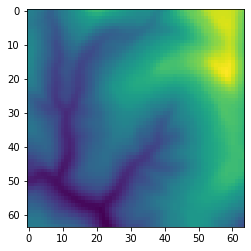

In [4]:
import matplotlib.pyplot as plt

dataset = ImagesDataset('./data')
plt.imshow(dataset[400].view(64, 64))
plt.show()

In [5]:
dataloader = DataLoader(dataset, batch_size=50, shuffle=True)

In [6]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        
        # Encoder specification
        self.enc_linear_1 = nn.Linear(64 * 64, 1024)
        self.enc_linear_2 = nn.Linear(1024, 512)
        self.enc_linear_3 = nn.Linear(512, 64)
        
        # Decoder specification
        self.dec_linear_1 = nn.Linear(64, 512)
        self.dec_linear_2 = nn.Linear(512, 1024)
        self.dec_linear_3 = nn.Linear(1024, 64 * 64)
        
    def encode(self, data):
        code = F.relu(self.enc_linear_1(data))
        code = F.relu(self.enc_linear_2(code))
        code = self.enc_linear_3(code)
        return code
        
    def decode(self, code):
        out = F.relu(self.dec_linear_1(code))
        out = F.relu(self.dec_linear_2(out))
        out = torch.sigmoid(self.dec_linear_3(out))
        return out
        
    def forward(self, data):
        code = self.encode(data)
        out = self.decode(code)
        return out

In [7]:
net = Autoencoder().cuda()

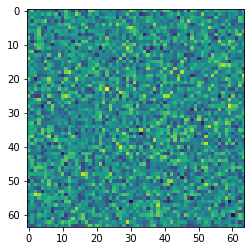

In [8]:
x = dataset[400].cuda()
output = net(x)
plt.imshow(output.cpu().view(64, 64).detach().numpy())
plt.show()

In [10]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.0001)

epochs = 1000

for epoch in range(epochs):
    for data in dataloader:
        net.zero_grad()
        x = data.cuda()
        output = net(x)
        loss = nn.MSELoss()(output, x)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0025, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0030, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0006, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0014, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0009, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward

tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(8.7941e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(8.8883e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.6566e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(9.7150e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.6707e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.0689e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.4730e-05, device='cuda:

tensor(6.1080e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.3997e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.3311e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(5.9800e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(8.9678e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(9.3275e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.5141e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(8.3133e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.3547e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.2666e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(5.3459e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(8.0457e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(8.5337e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(8.8914e-05, device='cuda:0', grad_fn=<MseLossBackward>)


tensor(7.9925e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.6474e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.9991e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.7087e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(5.4051e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.2517e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(5.8826e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.9551e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(9.9073e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(5.8656e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(8.1051e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.186

tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.8686e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.4159e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.8170e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.1042e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(8.4792e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(5.4752e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(3.2643e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.8192e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.5515e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(8.3633e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.3243e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.5189e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.2562e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tens

tensor(7.9610e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.7876e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(8.4150e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(5.3486e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.0771e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.1112e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.2624e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.3874e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(8.2223e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(9.0803e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.5154e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(5.6686e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.0791e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.5006e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(5.4390e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(5.9082e-05, device='cuda:0', grad_fn=<MseLossBac

tensor(6.1378e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(5.5933e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.2953e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.6678e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.8211e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.8517e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(8.0268e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(5.5373e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.5766e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.9884e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(3.4891e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.1622e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.4580e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.1216e-05, device='cuda:0', grad_fn=<MseLossBackward>)


tensor(7.8838e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(5.9290e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.6652e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(9.3484e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.7605e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.8504e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0001, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.0778e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(9.3700e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(6.2170e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.2468e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(5.7061e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.9489e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(7.6066e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.6459e-05, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(4.9774e-05, device='cuda:0', grad_fn=<MseLossBackwar

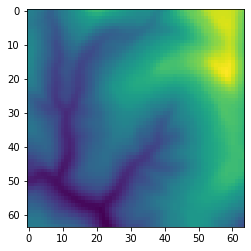

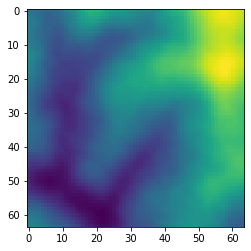

In [10]:
x = dataset[400].cuda()
plt.imshow(x.view(64, 64).cpu())
plt.show()
output = net(x)
plt.imshow(output.view(64, 64).cpu().detach().numpy())
plt.show()

In [12]:
#torch.save(net.state_dict(), './simple_autoencoder_save')

In [9]:
net.load_state_dict(torch.load('./simple_autoencoder_save'))

<All keys matched successfully>

In [11]:
# PCA
import numpy as np
from sklearn.decomposition import PCA

x = []
for data in dataset:
    code = net.encode(data.cuda())
    x.append(code.cpu().detach().numpy())

In [12]:
pca = PCA(n_components=64)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=64, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [13]:
print(pca.explained_variance_)

[2.46416389e+00 2.38630598e-01 1.98867530e-01 1.13502284e-01
 9.22600253e-02 7.49020479e-02 6.60469527e-02 4.59349050e-02
 4.34212639e-02 3.47331596e-02 3.36567588e-02 3.09413762e-02
 2.84589769e-02 2.56061162e-02 2.39795218e-02 2.13523875e-02
 2.02147582e-02 1.84072729e-02 1.69335628e-02 1.60855554e-02
 1.49650739e-02 1.37716489e-02 1.36244382e-02 1.33340840e-02
 1.27207794e-02 1.24446978e-02 1.13171895e-02 1.11032356e-02
 1.01005883e-02 9.98530859e-03 9.55098332e-03 8.93908060e-03
 8.65672635e-03 8.15741791e-03 7.91954787e-03 7.62206630e-03
 7.17852997e-03 7.01155611e-03 6.78804617e-03 6.61513308e-03
 6.50469967e-03 6.30797239e-03 5.89829727e-03 5.88558119e-03
 5.65042451e-03 5.38598335e-03 5.30953402e-03 4.99127678e-03
 4.94538758e-03 4.49727130e-03 4.28040225e-03 4.05436160e-03
 3.93796885e-03 3.76471661e-03 3.51435247e-03 3.12460834e-03
 2.95123733e-03 2.92802743e-03 2.85770682e-03 2.37366922e-03
 2.32003065e-03 2.11662236e-03 1.77923824e-03 5.15291453e-04]


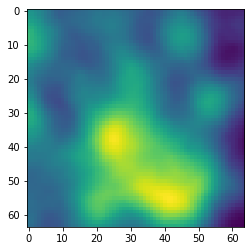

In [97]:
import numpy as np
import math
import random

# Generator
code = np.zeros(64)
for i in range(64):
    value = math.sqrt(pca.explained_variance_[i])
    code[i] = random.uniform(-2 * value, 2 * value)

code = pca.inverse_transform(code)
output = net.decode(torch.from_numpy(code).float().cuda())
plt.imshow(output.view(64, 64).cpu().detach().numpy())
plt.show()